# EDA PENGUINS - PALMER PENGUINS DATA


![]('.data/penguing.jpeg')


In [177]:
# Librerías
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [178]:
df=pd.read_csv('.\data\penguins_size.csv')

In [179]:
## Primera exploración de los datos

In [180]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [181]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [183]:
df.shape

(344, 7)

In [184]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


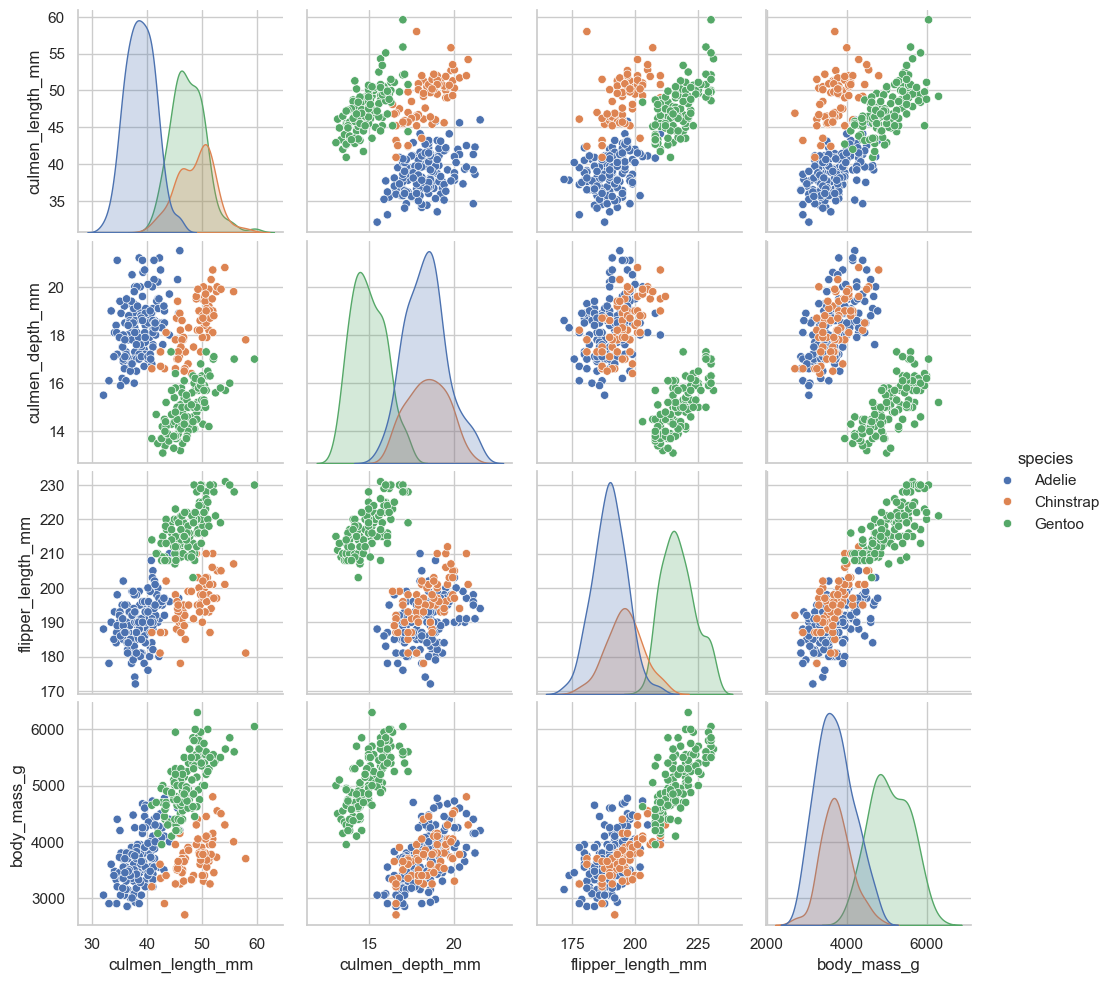

In [185]:
sns.pairplot(df, diag_kind='kde',hue='species');

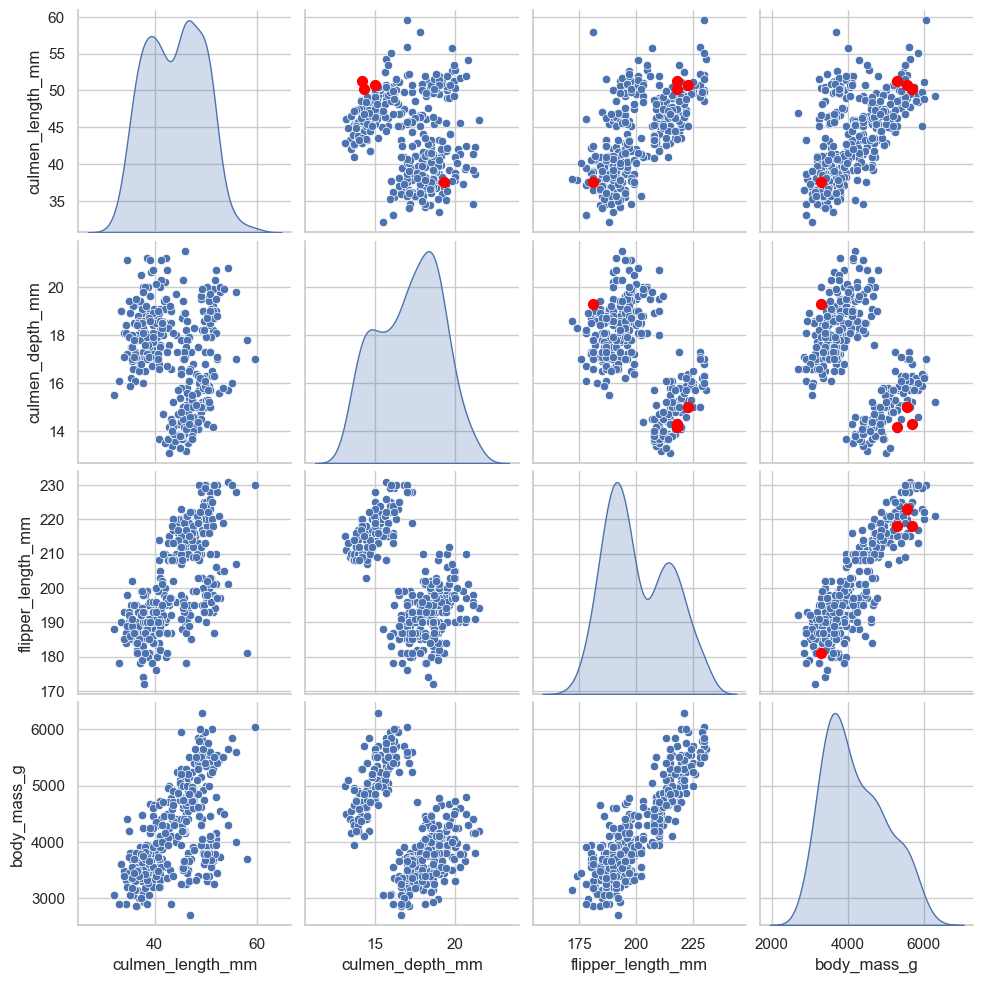

In [186]:
df_nums=df.select_dtypes(exclude='object')
std_dev=df_nums.std()
sns.set(style="whitegrid")
pair_plot = sns.pairplot(df_nums, diag_kind='kde')
outliers = df_nums[(df_nums - df_nums.mean()).abs() > 1 * std_dev].dropna()
# Resaltar puntos que superan dos veces la desviación estándar en rojo
for i, j in zip(*plt.np.triu_indices_from(pair_plot.axes, 1)):
    pair_plot.axes[i, j].scatter(outliers.iloc[:, j], outliers.iloc[:, i], color='red', s=50)

plt.show()

In [187]:
# Cardinalidad
for i in df.select_dtypes(include='object'):
    print(f"La cardinalidad de la variable {i} es {df[i].nunique()/df.shape[0]*100:.2f}%")
    

La cardinalidad de la variable species es 0.87%
La cardinalidad de la variable island es 0.87%
La cardinalidad de la variable sex es 0.87%


# Limpieza de datos


In [188]:
#Valores únicos de cada columna de tipo object
for i in df.select_dtypes(include='object'):
    print(f"Los valores únicos de la variable {i} son {df[i].unique()}")

Los valores únicos de la variable species son ['Adelie' 'Chinstrap' 'Gentoo']
Los valores únicos de la variable island son ['Torgersen' 'Biscoe' 'Dream']
Los valores únicos de la variable sex son ['MALE' 'FEMALE' nan '.']


In [189]:
# Sustituye '.' y nan por valor nulo
df = df.replace('.', np.nan)

In [190]:
for i in df.select_dtypes(include='object'):
    print(f"Los valores únicos de la variable {i} son {df[i].unique()}")

Los valores únicos de la variable species son ['Adelie' 'Chinstrap' 'Gentoo']
Los valores únicos de la variable island son ['Torgersen' 'Biscoe' 'Dream']
Los valores únicos de la variable sex son ['MALE' 'FEMALE' nan]


In [191]:
# Dataframe con todas registros que contienen algún campo nulo
df_null = df[df.isnull().any(axis=1)]
df_null

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


In [234]:
datos_relleno=df.groupby(['species','sex', 'island']).apply(lambda x: x.quantile(0.05).add(x.quantile(0.95)).div(2)).reset_index()
datos_relleno.reset_index(inplace=True)
datos_relleno.rename(columns={'level_0':'Id'}, inplace=True)

,Id,species,sex,island,index,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,Adelie,FEMALE,Biscoe,67.025,37.3475,17.7000,186.100,3338.125
1,1,Adelie,FEMALE,Dream,90.150,36.6800,17.4800,186.800,3335.000
2,2,Adelie,FEMALE,Torgersen,65.000,37.4700,17.6000,188.100,3415.000
3,3,Adelie,MALE,Biscoe,67.975,40.4400,19.1450,189.925,4135.625
4,4,Adelie,MALE,Dream,90.825,40.0950,19.0625,193.150,4028.750
5,5,Adelie,MALE,Torgersen,66.000,40.4900,19.6200,193.200,4070.000
6,6,Chinstrap,FEMALE,Dream,185.500,46.5525,17.6675,190.175,3506.250
7,7,Chinstrap,MALE,Dream,185.500,51.3725,19.3025,201.150,3941.250
8,8,Gentoo,FEMALE,Biscoe,280.225,45.6350,14.2075,213.575,4653.750
9,9,Gentoo,MALE,Biscoe,281.000,49.7500,15.7500,221.500,5500.000


In [211]:
print(datos_relleno.head(2))

  species     sex  island  culmen_length_mm  culmen_depth_mm  \
0  Adelie  FEMALE  Biscoe           37.3475            17.70   
1  Adelie  FEMALE   Dream           36.6800            17.48   

   flipper_length_mm  body_mass_g  
0              186.1     3338.125  
1              186.8     3335.000  


In [193]:
# rellenar los nulos con la tabla anterior 
df = df.fillna(datos_relleno)

In [222]:
datos_relleno

,level_0,species,sex,island,index,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,0,Adelie,FEMALE,Biscoe,67.025,37.3475,17.7000,186.100,3338.125
1,1,Adelie,FEMALE,Dream,90.150,36.6800,17.4800,186.800,3335.000
2,2,Adelie,FEMALE,Torgersen,65.000,37.4700,17.6000,188.100,3415.000
3,3,Adelie,MALE,Biscoe,67.975,40.4400,19.1450,189.925,4135.625
4,4,Adelie,MALE,Dream,90.825,40.0950,19.0625,193.150,4028.750
5,5,Adelie,MALE,Torgersen,66.000,40.4900,19.6200,193.200,4070.000
6,6,Chinstrap,FEMALE,Dream,185.500,46.5525,17.6675,190.175,3506.250
7,7,Chinstrap,MALE,Dream,185.500,51.3725,19.3025,201.150,3941.250
8,8,Gentoo,FEMALE,Biscoe,280.225,45.6350,14.2075,213.575,4653.750
9,9,Gentoo,MALE,Biscoe,281.000,49.7500,15.7500,221.500,5500.000


ValueError: cannot insert level_0, already exists

In [194]:
df.reset_index(inplace=True)

In [197]:
import numpy as np

def residuo(datos_relleno, datos_original):
    residuo = np.abs(datos_relleno - datos_original)
    return residuo

merged=df_nums.merge(datos_relleno, how='right', on=['species','island'])


KeyError: 'species'

In [133]:
df.reset_index(inplace=True)

In [134]:
merged['res']=residuo(merged['culmen_length_mm_x'],merged['culmen_length_mm_y'])+residuo(merged['culmen_depth_mm_x'],merged['culmen_depth_mm_y'])+residuo(merged['flipper_length_mm_x'],merged['flipper_length_mm_y'])+residuo(merged['body_mass_g_x'],merged['body_mass_g_y'])

# Hipótesis


## Estadísticas descriptivas


1. Tamaño y Sexo


2. Especie y Características Físicas


3. Aleta y Masa Corporal


## Análisis Gráficos


1. Distribución de las características por isla


2. Relación entre la longitud y profundidad del pico


3. Interacción entre Especies, Islas y Características Físicas
